# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [15]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

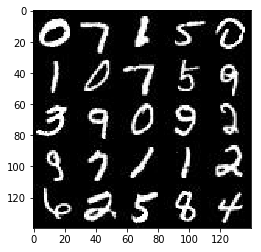

In [16]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

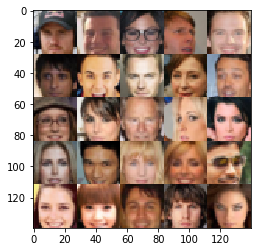

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


/home/krishna/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [19]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32,shape=[None,image_width,image_height,image_channels],name="real_input")
    z_input = tf.placeholder(tf.float32,shape=[None,z_dim],name="z_input")
    learning_rate = tf.placeholder(tf.float32)

    return real_inputs, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [20]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 8, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x8
        
        x2 = tf.layers.conv2d(relu1, 32, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x32
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x128
        
        x4 = tf.layers.conv2d(relu3, 256, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        # 2x2x256
 
        
        # Flatten it
        flat = tf.reshape(relu4, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [21]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 2x2x256 now
                
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 4x4x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 4, strides=1, padding='valid')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 7x7x32 now
  
        x4 = tf.layers.conv2d_transpose(x3, 8, 5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 14x14x8 now
  
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [22]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real_labels = tf.truncated_normal(tf.shape(d_model_real),mean=0.95,stddev=0.025)
    d_loss_fake_labels = tf.truncated_normal(tf.shape(d_model_fake),mean=0.05,stddev=0.025)


    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=d_loss_real_labels))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=d_loss_fake_labels))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [23]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.normal(0, 0.5, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [25]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    show_every = 200
    print_every = 50

    samples, losses = [], []
    steps = 0
    
    input_real, input_z, learning_rate_placeholder = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z,data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate_placeholder, beta1)

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images*2
                # TODO: Train Model
                steps += 1


                # Sample random noise for G
                batch_z = np.random.normal(0, 0.5, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate_placeholder : learning_rate })
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learning_rate_placeholder : learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learning_rate_placeholder : learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)          
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0981... Generator Loss: 0.7154
Epoch 1/2... Discriminator Loss: 2.1656... Generator Loss: 0.1684
Epoch 1/2... Discriminator Loss: 1.4160... Generator Loss: 1.1880
Epoch 1/2... Discriminator Loss: 1.9282... Generator Loss: 0.2306


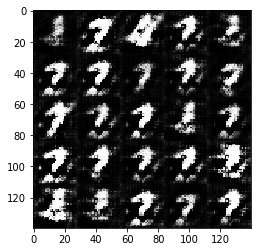

Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 0.9013
Epoch 1/2... Discriminator Loss: 1.3094... Generator Loss: 0.4973
Epoch 1/2... Discriminator Loss: 1.2125... Generator Loss: 1.0545
Epoch 1/2... Discriminator Loss: 1.7428... Generator Loss: 0.3405


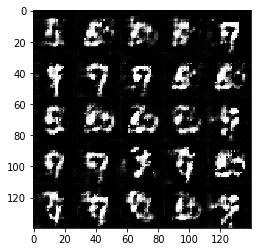

Epoch 1/2... Discriminator Loss: 1.5594... Generator Loss: 0.4219
Epoch 1/2... Discriminator Loss: 1.5770... Generator Loss: 0.3879
Epoch 1/2... Discriminator Loss: 1.4007... Generator Loss: 0.4652
Epoch 1/2... Discriminator Loss: 1.3927... Generator Loss: 1.0161


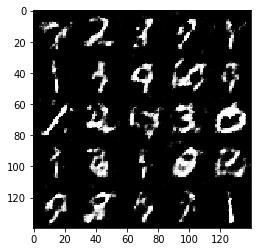

Epoch 1/2... Discriminator Loss: 1.3360... Generator Loss: 0.6170
Epoch 1/2... Discriminator Loss: 1.3932... Generator Loss: 0.5271
Epoch 1/2... Discriminator Loss: 1.3410... Generator Loss: 0.6379
Epoch 1/2... Discriminator Loss: 1.6055... Generator Loss: 0.3215


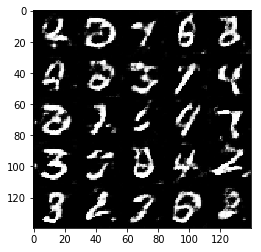

Epoch 1/2... Discriminator Loss: 1.5123... Generator Loss: 0.4236
Epoch 1/2... Discriminator Loss: 1.3741... Generator Loss: 0.4547
Epoch 2/2... Discriminator Loss: 1.4947... Generator Loss: 0.3946
Epoch 2/2... Discriminator Loss: 1.5242... Generator Loss: 0.5015


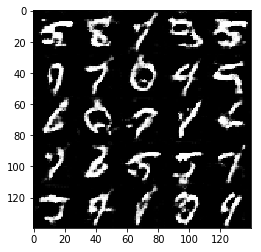

Epoch 2/2... Discriminator Loss: 1.2669... Generator Loss: 0.6985
Epoch 2/2... Discriminator Loss: 1.8803... Generator Loss: 0.2364
Epoch 2/2... Discriminator Loss: 1.5630... Generator Loss: 0.3686
Epoch 2/2... Discriminator Loss: 1.4095... Generator Loss: 0.7107


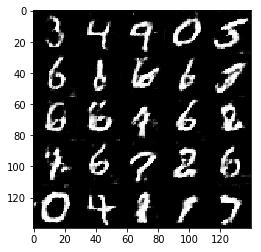

Epoch 2/2... Discriminator Loss: 1.4200... Generator Loss: 0.4392
Epoch 2/2... Discriminator Loss: 1.3577... Generator Loss: 0.6703
Epoch 2/2... Discriminator Loss: 1.3846... Generator Loss: 0.4885
Epoch 2/2... Discriminator Loss: 1.6551... Generator Loss: 0.3016


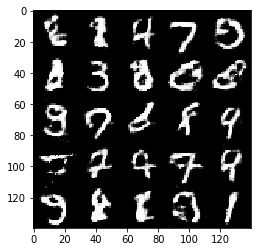

Epoch 2/2... Discriminator Loss: 2.2787... Generator Loss: 0.1560
Epoch 2/2... Discriminator Loss: 1.4377... Generator Loss: 0.5083
Epoch 2/2... Discriminator Loss: 1.5061... Generator Loss: 0.3540
Epoch 2/2... Discriminator Loss: 1.3011... Generator Loss: 0.4977


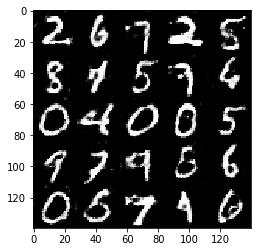

Epoch 2/2... Discriminator Loss: 1.6756... Generator Loss: 0.2914
Epoch 2/2... Discriminator Loss: 1.5348... Generator Loss: 0.5050
Epoch 2/2... Discriminator Loss: 1.2234... Generator Loss: 1.4396
Epoch 2/2... Discriminator Loss: 3.6499... Generator Loss: 0.0449


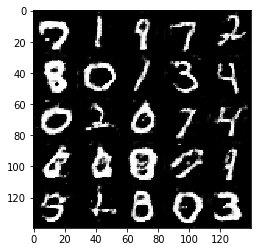

Epoch 2/2... Discriminator Loss: 1.5601... Generator Loss: 0.3756


In [26]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/5... Discriminator Loss: 1.2631... Generator Loss: 1.1439
Epoch 1/5... Discriminator Loss: 1.4970... Generator Loss: 0.5217
Epoch 1/5... Discriminator Loss: 1.0253... Generator Loss: 0.9175
Epoch 1/5... Discriminator Loss: 1.1306... Generator Loss: 0.8965


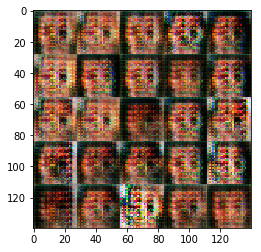

Epoch 1/5... Discriminator Loss: 1.3191... Generator Loss: 0.5218
Epoch 1/5... Discriminator Loss: 1.2775... Generator Loss: 0.7880
Epoch 1/5... Discriminator Loss: 1.5308... Generator Loss: 0.6272
Epoch 1/5... Discriminator Loss: 1.2144... Generator Loss: 0.9165


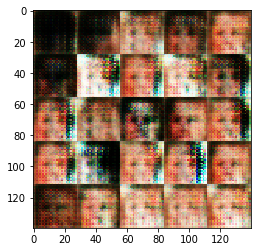

Epoch 1/5... Discriminator Loss: 1.4141... Generator Loss: 0.7411
Epoch 1/5... Discriminator Loss: 1.5495... Generator Loss: 0.5891
Epoch 1/5... Discriminator Loss: 1.3308... Generator Loss: 0.5992
Epoch 1/5... Discriminator Loss: 1.2902... Generator Loss: 0.6671


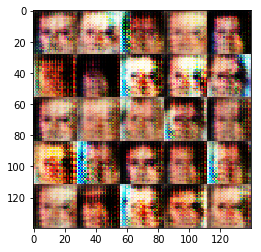

Epoch 1/5... Discriminator Loss: 1.2607... Generator Loss: 0.7644
Epoch 1/5... Discriminator Loss: 1.3894... Generator Loss: 0.6018
Epoch 1/5... Discriminator Loss: 1.2364... Generator Loss: 1.2048
Epoch 1/5... Discriminator Loss: 1.4299... Generator Loss: 0.5597


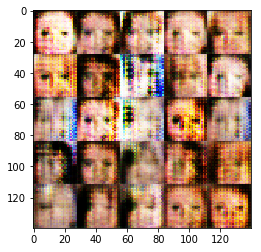

Epoch 1/5... Discriminator Loss: 1.4619... Generator Loss: 0.4599
Epoch 1/5... Discriminator Loss: 1.5012... Generator Loss: 0.4584
Epoch 1/5... Discriminator Loss: 1.3606... Generator Loss: 0.5399
Epoch 1/5... Discriminator Loss: 1.3344... Generator Loss: 0.7614


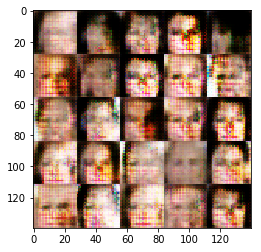

Epoch 1/5... Discriminator Loss: 1.3227... Generator Loss: 0.6574
Epoch 1/5... Discriminator Loss: 1.5789... Generator Loss: 0.3664
Epoch 1/5... Discriminator Loss: 1.3358... Generator Loss: 0.6682
Epoch 1/5... Discriminator Loss: 1.3186... Generator Loss: 0.6776


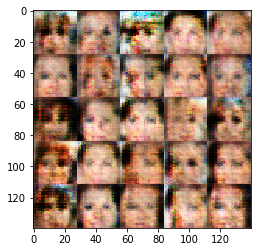

Epoch 1/5... Discriminator Loss: 1.6540... Generator Loss: 0.4095
Epoch 1/5... Discriminator Loss: 1.3546... Generator Loss: 0.5011
Epoch 1/5... Discriminator Loss: 1.3682... Generator Loss: 0.7354
Epoch 1/5... Discriminator Loss: 1.3138... Generator Loss: 0.5445


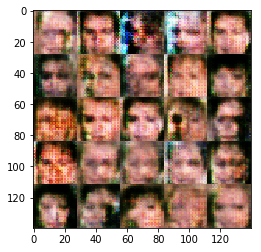

Epoch 1/5... Discriminator Loss: 1.3473... Generator Loss: 0.6839
Epoch 1/5... Discriminator Loss: 1.2175... Generator Loss: 0.8994
Epoch 1/5... Discriminator Loss: 1.3255... Generator Loss: 0.6264
Epoch 1/5... Discriminator Loss: 1.4134... Generator Loss: 0.5831


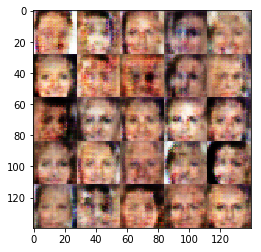

Epoch 1/5... Discriminator Loss: 1.4120... Generator Loss: 0.8904
Epoch 1/5... Discriminator Loss: 1.3213... Generator Loss: 0.9510
Epoch 1/5... Discriminator Loss: 1.5133... Generator Loss: 0.4530
Epoch 1/5... Discriminator Loss: 1.2972... Generator Loss: 0.6017


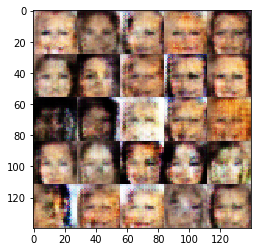

Epoch 1/5... Discriminator Loss: 1.5334... Generator Loss: 0.5924
Epoch 1/5... Discriminator Loss: 1.5470... Generator Loss: 0.4111
Epoch 1/5... Discriminator Loss: 1.2830... Generator Loss: 0.6786
Epoch 1/5... Discriminator Loss: 1.4603... Generator Loss: 0.5168


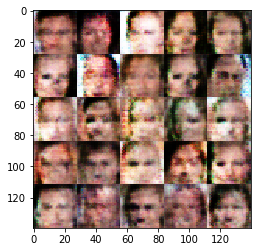

Epoch 1/5... Discriminator Loss: 1.2567... Generator Loss: 0.7917
Epoch 1/5... Discriminator Loss: 1.4902... Generator Loss: 0.4607
Epoch 1/5... Discriminator Loss: 1.3191... Generator Loss: 0.5839
Epoch 1/5... Discriminator Loss: 1.4214... Generator Loss: 0.5156


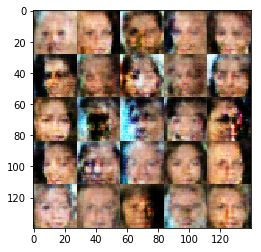

Epoch 1/5... Discriminator Loss: 1.3680... Generator Loss: 0.5087
Epoch 1/5... Discriminator Loss: 1.3474... Generator Loss: 0.7065
Epoch 1/5... Discriminator Loss: 1.3834... Generator Loss: 0.6200
Epoch 1/5... Discriminator Loss: 1.4394... Generator Loss: 0.6515


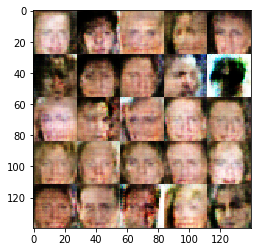

Epoch 1/5... Discriminator Loss: 1.3670... Generator Loss: 0.7124
Epoch 1/5... Discriminator Loss: 1.4033... Generator Loss: 0.5055
Epoch 1/5... Discriminator Loss: 1.5918... Generator Loss: 0.4682
Epoch 1/5... Discriminator Loss: 1.3634... Generator Loss: 0.6475


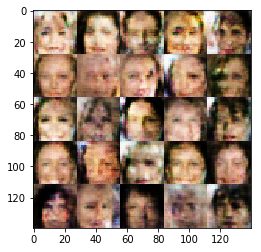

Epoch 1/5... Discriminator Loss: 1.4477... Generator Loss: 0.5955
Epoch 1/5... Discriminator Loss: 1.4865... Generator Loss: 0.7192
Epoch 1/5... Discriminator Loss: 1.2821... Generator Loss: 0.7459
Epoch 1/5... Discriminator Loss: 1.4173... Generator Loss: 0.6530


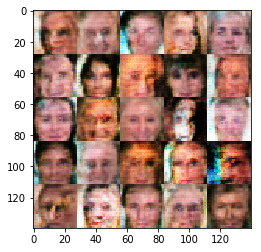

Epoch 1/5... Discriminator Loss: 1.6327... Generator Loss: 0.4510
Epoch 1/5... Discriminator Loss: 1.3916... Generator Loss: 0.5881
Epoch 1/5... Discriminator Loss: 1.4195... Generator Loss: 0.6842
Epoch 1/5... Discriminator Loss: 1.2694... Generator Loss: 0.8252


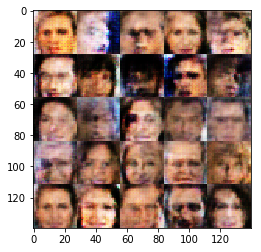

Epoch 1/5... Discriminator Loss: 1.4518... Generator Loss: 0.6314
Epoch 1/5... Discriminator Loss: 1.3620... Generator Loss: 0.5297
Epoch 1/5... Discriminator Loss: 1.4677... Generator Loss: 0.5970
Epoch 2/5... Discriminator Loss: 1.4322... Generator Loss: 0.6101


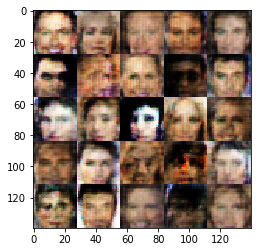

Epoch 2/5... Discriminator Loss: 1.6073... Generator Loss: 0.3355
Epoch 2/5... Discriminator Loss: 1.3081... Generator Loss: 0.6554
Epoch 2/5... Discriminator Loss: 1.3399... Generator Loss: 0.6862
Epoch 2/5... Discriminator Loss: 1.4130... Generator Loss: 0.5601


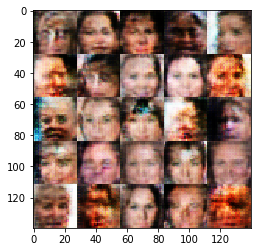

Epoch 2/5... Discriminator Loss: 1.2902... Generator Loss: 0.5925
Epoch 2/5... Discriminator Loss: 1.4411... Generator Loss: 0.5515
Epoch 2/5... Discriminator Loss: 1.4764... Generator Loss: 0.4869
Epoch 2/5... Discriminator Loss: 1.5779... Generator Loss: 0.3899


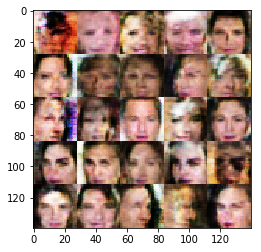

Epoch 2/5... Discriminator Loss: 1.4431... Generator Loss: 0.5265
Epoch 2/5... Discriminator Loss: 1.4598... Generator Loss: 0.4904
Epoch 2/5... Discriminator Loss: 1.5701... Generator Loss: 0.4036
Epoch 2/5... Discriminator Loss: 1.3693... Generator Loss: 0.5134


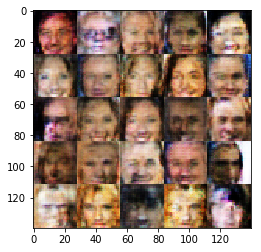

Epoch 2/5... Discriminator Loss: 1.2497... Generator Loss: 0.6375
Epoch 2/5... Discriminator Loss: 1.3088... Generator Loss: 0.6219
Epoch 2/5... Discriminator Loss: 1.3636... Generator Loss: 0.5302
Epoch 2/5... Discriminator Loss: 1.4485... Generator Loss: 0.4426


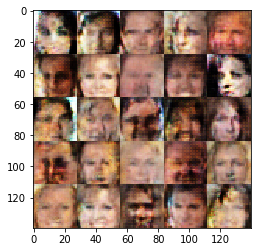

Epoch 2/5... Discriminator Loss: 1.6007... Generator Loss: 0.3679
Epoch 2/5... Discriminator Loss: 1.3115... Generator Loss: 0.5120
Epoch 2/5... Discriminator Loss: 1.1000... Generator Loss: 0.8026
Epoch 2/5... Discriminator Loss: 1.7223... Generator Loss: 0.2768


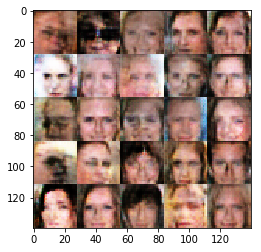

Epoch 2/5... Discriminator Loss: 1.3776... Generator Loss: 0.5613
Epoch 2/5... Discriminator Loss: 1.2334... Generator Loss: 0.6331
Epoch 2/5... Discriminator Loss: 1.2885... Generator Loss: 0.6261
Epoch 2/5... Discriminator Loss: 1.5139... Generator Loss: 0.3737


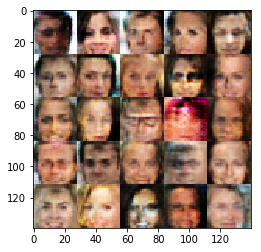

Epoch 2/5... Discriminator Loss: 1.2128... Generator Loss: 0.8093
Epoch 2/5... Discriminator Loss: 1.2162... Generator Loss: 0.6476
Epoch 2/5... Discriminator Loss: 1.4656... Generator Loss: 0.4931
Epoch 2/5... Discriminator Loss: 1.3483... Generator Loss: 1.4202


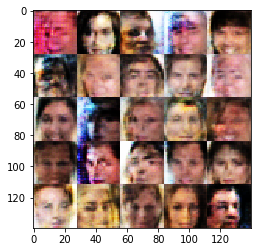

Epoch 2/5... Discriminator Loss: 1.3412... Generator Loss: 0.5289
Epoch 2/5... Discriminator Loss: 1.3549... Generator Loss: 0.5702
Epoch 2/5... Discriminator Loss: 1.3421... Generator Loss: 0.6029
Epoch 2/5... Discriminator Loss: 1.3414... Generator Loss: 1.6986


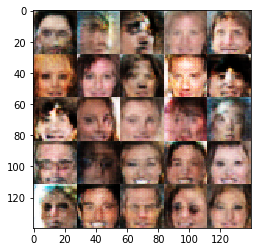

Epoch 2/5... Discriminator Loss: 1.4029... Generator Loss: 0.4696
Epoch 2/5... Discriminator Loss: 1.3540... Generator Loss: 0.7784
Epoch 2/5... Discriminator Loss: 1.1410... Generator Loss: 0.7887
Epoch 2/5... Discriminator Loss: 1.3260... Generator Loss: 0.4941


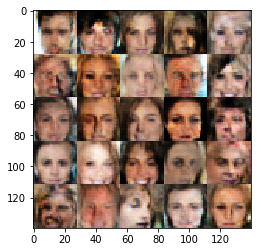

Epoch 2/5... Discriminator Loss: 1.2866... Generator Loss: 0.5092
Epoch 2/5... Discriminator Loss: 1.4371... Generator Loss: 0.4719
Epoch 2/5... Discriminator Loss: 1.3269... Generator Loss: 0.5529
Epoch 2/5... Discriminator Loss: 1.4184... Generator Loss: 0.7621


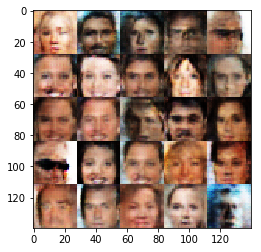

Epoch 2/5... Discriminator Loss: 1.1728... Generator Loss: 0.8700
Epoch 2/5... Discriminator Loss: 1.6671... Generator Loss: 0.3129
Epoch 2/5... Discriminator Loss: 1.2683... Generator Loss: 0.8923
Epoch 2/5... Discriminator Loss: 1.4241... Generator Loss: 0.4233


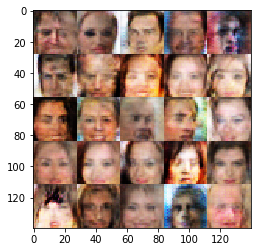

Epoch 2/5... Discriminator Loss: 1.4103... Generator Loss: 1.0456
Epoch 2/5... Discriminator Loss: 1.1409... Generator Loss: 0.8248
Epoch 2/5... Discriminator Loss: 1.2354... Generator Loss: 0.5996
Epoch 2/5... Discriminator Loss: 1.1451... Generator Loss: 0.9667


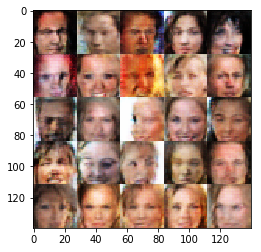

Epoch 2/5... Discriminator Loss: 1.5273... Generator Loss: 0.3581
Epoch 2/5... Discriminator Loss: 1.3988... Generator Loss: 0.4293
Epoch 2/5... Discriminator Loss: 1.2678... Generator Loss: 0.5401
Epoch 2/5... Discriminator Loss: 1.4943... Generator Loss: 0.3938


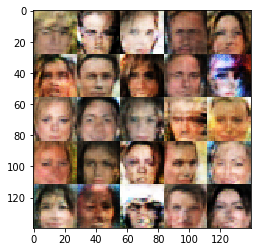

Epoch 2/5... Discriminator Loss: 1.4838... Generator Loss: 0.4064
Epoch 2/5... Discriminator Loss: 1.2750... Generator Loss: 0.6581
Epoch 2/5... Discriminator Loss: 1.5055... Generator Loss: 0.3936
Epoch 2/5... Discriminator Loss: 1.4221... Generator Loss: 0.4173


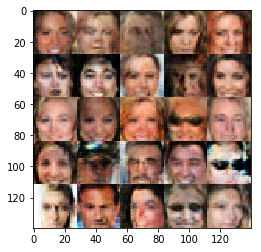

Epoch 2/5... Discriminator Loss: 1.1615... Generator Loss: 0.9245
Epoch 2/5... Discriminator Loss: 1.2263... Generator Loss: 0.6841
Epoch 2/5... Discriminator Loss: 1.5922... Generator Loss: 0.3311
Epoch 2/5... Discriminator Loss: 1.6308... Generator Loss: 0.3699


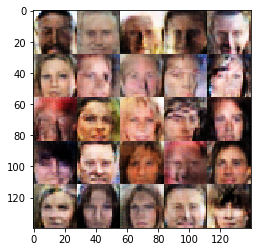

Epoch 2/5... Discriminator Loss: 1.3609... Generator Loss: 0.4894
Epoch 2/5... Discriminator Loss: 1.4349... Generator Loss: 0.5565
Epoch 3/5... Discriminator Loss: 1.0081... Generator Loss: 0.9481
Epoch 3/5... Discriminator Loss: 1.1943... Generator Loss: 1.1105


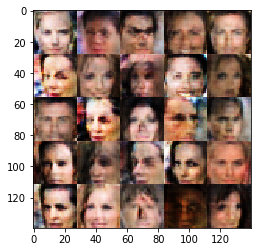

Epoch 3/5... Discriminator Loss: 1.5029... Generator Loss: 0.4158
Epoch 3/5... Discriminator Loss: 1.2585... Generator Loss: 0.5162
Epoch 3/5... Discriminator Loss: 1.3803... Generator Loss: 0.5039
Epoch 3/5... Discriminator Loss: 1.5957... Generator Loss: 0.3588


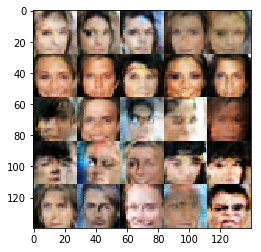

Epoch 3/5... Discriminator Loss: 1.0559... Generator Loss: 0.9073
Epoch 3/5... Discriminator Loss: 1.1890... Generator Loss: 0.7102
Epoch 3/5... Discriminator Loss: 1.6224... Generator Loss: 0.3862
Epoch 3/5... Discriminator Loss: 1.2900... Generator Loss: 0.8214


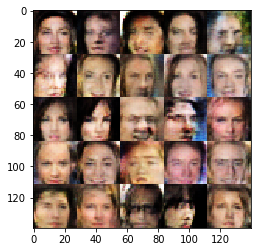

Epoch 3/5... Discriminator Loss: 1.7658... Generator Loss: 0.3178
Epoch 3/5... Discriminator Loss: 1.4505... Generator Loss: 0.5103
Epoch 3/5... Discriminator Loss: 1.5393... Generator Loss: 0.3850
Epoch 3/5... Discriminator Loss: 1.1931... Generator Loss: 0.6347


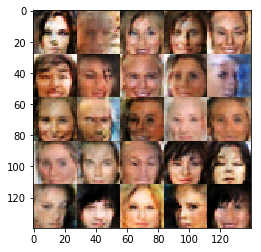

Epoch 3/5... Discriminator Loss: 1.3147... Generator Loss: 0.5222
Epoch 3/5... Discriminator Loss: 1.4073... Generator Loss: 0.5243
Epoch 3/5... Discriminator Loss: 1.3471... Generator Loss: 0.5081
Epoch 3/5... Discriminator Loss: 1.1966... Generator Loss: 0.6776


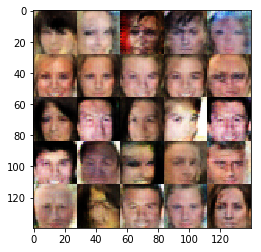

Epoch 3/5... Discriminator Loss: 1.3404... Generator Loss: 0.5095
Epoch 3/5... Discriminator Loss: 1.5003... Generator Loss: 0.3747
Epoch 3/5... Discriminator Loss: 1.4340... Generator Loss: 0.4292
Epoch 3/5... Discriminator Loss: 1.2475... Generator Loss: 1.3129


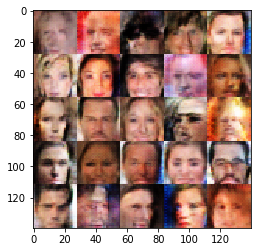

Epoch 3/5... Discriminator Loss: 1.7587... Generator Loss: 0.2893
Epoch 3/5... Discriminator Loss: 1.7888... Generator Loss: 0.2755
Epoch 3/5... Discriminator Loss: 1.1640... Generator Loss: 0.8105
Epoch 3/5... Discriminator Loss: 1.4093... Generator Loss: 0.4795


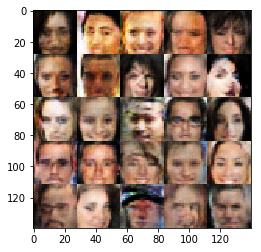

Epoch 3/5... Discriminator Loss: 1.4007... Generator Loss: 0.4465
Epoch 3/5... Discriminator Loss: 1.3418... Generator Loss: 0.4823
Epoch 3/5... Discriminator Loss: 1.6183... Generator Loss: 0.3813
Epoch 3/5... Discriminator Loss: 1.3610... Generator Loss: 0.4848


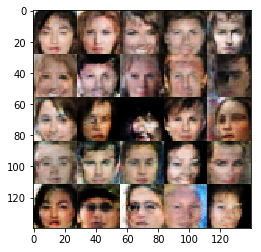

Epoch 3/5... Discriminator Loss: 1.0261... Generator Loss: 0.9224
Epoch 3/5... Discriminator Loss: 1.2040... Generator Loss: 1.1306
Epoch 3/5... Discriminator Loss: 1.4156... Generator Loss: 0.4482
Epoch 3/5... Discriminator Loss: 1.3188... Generator Loss: 1.5610


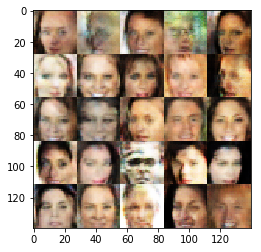

Epoch 3/5... Discriminator Loss: 1.0758... Generator Loss: 0.7570
Epoch 3/5... Discriminator Loss: 1.3172... Generator Loss: 0.5265
Epoch 3/5... Discriminator Loss: 1.4826... Generator Loss: 0.4119
Epoch 3/5... Discriminator Loss: 1.2931... Generator Loss: 1.4035


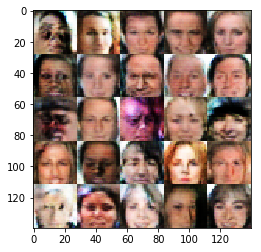

Epoch 3/5... Discriminator Loss: 1.1341... Generator Loss: 0.8799
Epoch 3/5... Discriminator Loss: 1.3910... Generator Loss: 0.4257
Epoch 3/5... Discriminator Loss: 1.4802... Generator Loss: 0.3918
Epoch 3/5... Discriminator Loss: 1.3271... Generator Loss: 0.5550


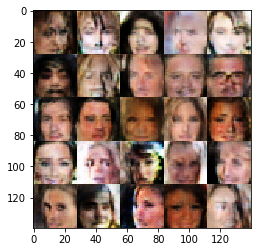

Epoch 3/5... Discriminator Loss: 1.4923... Generator Loss: 0.3884
Epoch 3/5... Discriminator Loss: 1.3871... Generator Loss: 0.4614
Epoch 3/5... Discriminator Loss: 1.4515... Generator Loss: 0.4285
Epoch 3/5... Discriminator Loss: 1.2508... Generator Loss: 0.5826


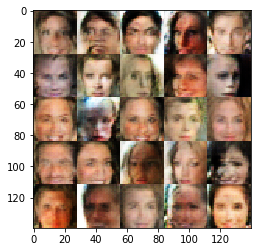

Epoch 3/5... Discriminator Loss: 1.4950... Generator Loss: 0.3878
Epoch 3/5... Discriminator Loss: 1.6900... Generator Loss: 0.2996
Epoch 3/5... Discriminator Loss: 1.1676... Generator Loss: 0.7163
Epoch 3/5... Discriminator Loss: 1.3930... Generator Loss: 0.4233


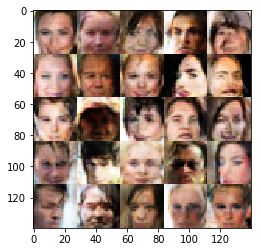

Epoch 3/5... Discriminator Loss: 1.3528... Generator Loss: 0.4662
Epoch 3/5... Discriminator Loss: 1.1483... Generator Loss: 0.7087
Epoch 3/5... Discriminator Loss: 1.1050... Generator Loss: 0.7485
Epoch 3/5... Discriminator Loss: 1.1362... Generator Loss: 0.6775


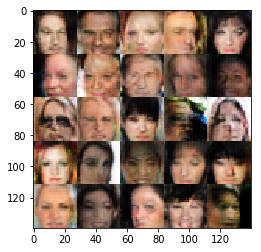

Epoch 3/5... Discriminator Loss: 0.9923... Generator Loss: 1.2862
Epoch 3/5... Discriminator Loss: 1.2364... Generator Loss: 0.9049
Epoch 3/5... Discriminator Loss: 1.3049... Generator Loss: 0.5268
Epoch 3/5... Discriminator Loss: 2.0957... Generator Loss: 0.2009


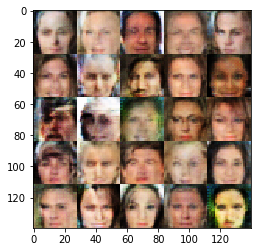

Epoch 3/5... Discriminator Loss: 1.0130... Generator Loss: 0.7624
Epoch 3/5... Discriminator Loss: 1.0282... Generator Loss: 0.9141
Epoch 3/5... Discriminator Loss: 1.4025... Generator Loss: 0.5016
Epoch 3/5... Discriminator Loss: 1.5672... Generator Loss: 0.3516


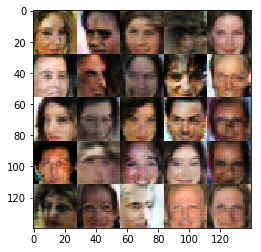

Epoch 3/5... Discriminator Loss: 1.4874... Generator Loss: 0.4910
Epoch 4/5... Discriminator Loss: 1.6641... Generator Loss: 0.3376
Epoch 4/5... Discriminator Loss: 1.0636... Generator Loss: 0.7201
Epoch 4/5... Discriminator Loss: 1.6995... Generator Loss: 0.3013


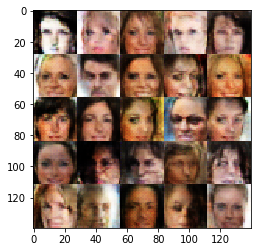

Epoch 4/5... Discriminator Loss: 2.3998... Generator Loss: 0.1402
Epoch 4/5... Discriminator Loss: 1.7668... Generator Loss: 0.3268
Epoch 4/5... Discriminator Loss: 1.8824... Generator Loss: 0.2628
Epoch 4/5... Discriminator Loss: 1.2565... Generator Loss: 0.5595


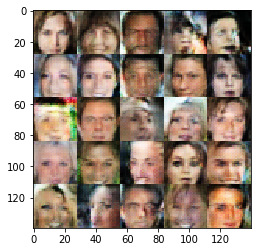

Epoch 4/5... Discriminator Loss: 1.9515... Generator Loss: 0.2506
Epoch 4/5... Discriminator Loss: 0.9169... Generator Loss: 1.1036
Epoch 4/5... Discriminator Loss: 1.6539... Generator Loss: 0.3262
Epoch 4/5... Discriminator Loss: 1.5849... Generator Loss: 0.3458


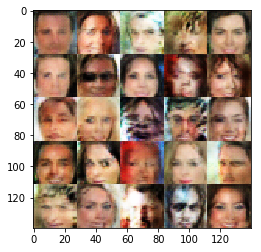

Epoch 4/5... Discriminator Loss: 1.1433... Generator Loss: 0.7046
Epoch 4/5... Discriminator Loss: 1.4070... Generator Loss: 0.4610
Epoch 4/5... Discriminator Loss: 1.3330... Generator Loss: 0.4779
Epoch 4/5... Discriminator Loss: 1.9452... Generator Loss: 0.2525


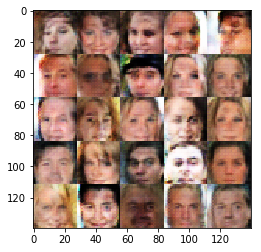

Epoch 4/5... Discriminator Loss: 1.9610... Generator Loss: 0.2587
Epoch 4/5... Discriminator Loss: 1.2423... Generator Loss: 0.6111
Epoch 4/5... Discriminator Loss: 1.3098... Generator Loss: 0.5014
Epoch 4/5... Discriminator Loss: 1.5352... Generator Loss: 0.4017


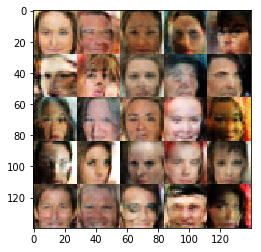

Epoch 4/5... Discriminator Loss: 1.2369... Generator Loss: 0.6313
Epoch 4/5... Discriminator Loss: 1.7439... Generator Loss: 0.2915
Epoch 4/5... Discriminator Loss: 1.5912... Generator Loss: 0.3839
Epoch 4/5... Discriminator Loss: 1.0674... Generator Loss: 0.7251


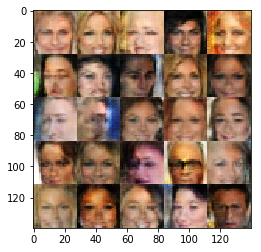

Epoch 4/5... Discriminator Loss: 1.1521... Generator Loss: 0.6363
Epoch 4/5... Discriminator Loss: 1.3560... Generator Loss: 0.5262
Epoch 4/5... Discriminator Loss: 1.2038... Generator Loss: 0.6270
Epoch 4/5... Discriminator Loss: 1.3167... Generator Loss: 0.5226


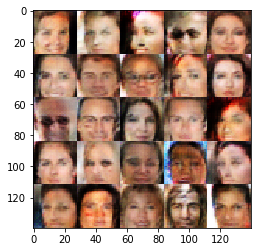

Epoch 4/5... Discriminator Loss: 1.5165... Generator Loss: 0.4039
Epoch 4/5... Discriminator Loss: 1.5133... Generator Loss: 0.4165
Epoch 4/5... Discriminator Loss: 1.7555... Generator Loss: 0.3450
Epoch 4/5... Discriminator Loss: 1.3480... Generator Loss: 0.4863


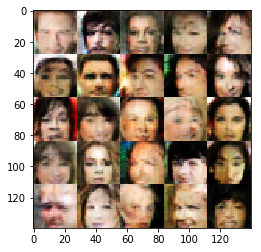

Epoch 4/5... Discriminator Loss: 1.6351... Generator Loss: 0.3423
Epoch 4/5... Discriminator Loss: 2.0965... Generator Loss: 0.1817
Epoch 4/5... Discriminator Loss: 1.2364... Generator Loss: 0.5860
Epoch 4/5... Discriminator Loss: 1.3918... Generator Loss: 0.4586


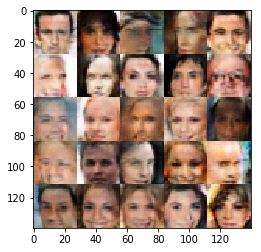

Epoch 4/5... Discriminator Loss: 1.5226... Generator Loss: 0.4355
Epoch 4/5... Discriminator Loss: 1.4479... Generator Loss: 0.5227
Epoch 4/5... Discriminator Loss: 1.0590... Generator Loss: 0.9070
Epoch 4/5... Discriminator Loss: 1.0107... Generator Loss: 0.8250


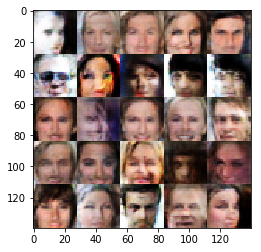

Epoch 4/5... Discriminator Loss: 1.5525... Generator Loss: 0.3971
Epoch 4/5... Discriminator Loss: 1.8218... Generator Loss: 0.2749
Epoch 4/5... Discriminator Loss: 1.3075... Generator Loss: 0.5896
Epoch 4/5... Discriminator Loss: 1.3272... Generator Loss: 0.5337


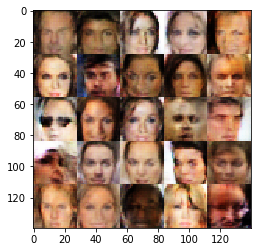

Epoch 4/5... Discriminator Loss: 1.1235... Generator Loss: 0.6720
Epoch 4/5... Discriminator Loss: 1.2122... Generator Loss: 0.6323
Epoch 4/5... Discriminator Loss: 1.2248... Generator Loss: 0.6434
Epoch 4/5... Discriminator Loss: 1.6500... Generator Loss: 0.3265


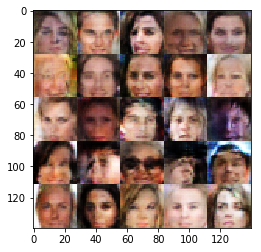

Epoch 4/5... Discriminator Loss: 1.7614... Generator Loss: 0.2992
Epoch 4/5... Discriminator Loss: 0.8177... Generator Loss: 1.3033
Epoch 4/5... Discriminator Loss: 1.3257... Generator Loss: 0.6140
Epoch 4/5... Discriminator Loss: 1.3789... Generator Loss: 0.5103


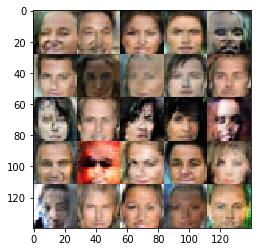

Epoch 4/5... Discriminator Loss: 1.3800... Generator Loss: 0.5499
Epoch 4/5... Discriminator Loss: 1.2837... Generator Loss: 0.5094
Epoch 4/5... Discriminator Loss: 1.7529... Generator Loss: 0.2885
Epoch 4/5... Discriminator Loss: 1.6322... Generator Loss: 0.4196


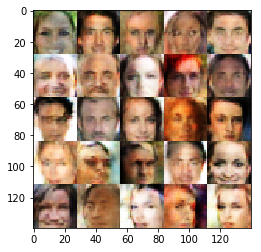

Epoch 4/5... Discriminator Loss: 1.1691... Generator Loss: 0.5876
Epoch 4/5... Discriminator Loss: 1.4226... Generator Loss: 0.5084
Epoch 4/5... Discriminator Loss: 1.5512... Generator Loss: 0.3695
Epoch 4/5... Discriminator Loss: 1.5805... Generator Loss: 0.3484


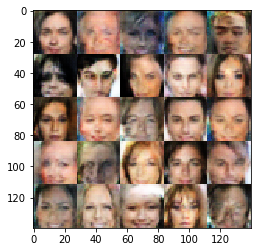

Epoch 4/5... Discriminator Loss: 1.9451... Generator Loss: 0.2398
Epoch 4/5... Discriminator Loss: 0.9925... Generator Loss: 0.7842
Epoch 4/5... Discriminator Loss: 1.2330... Generator Loss: 0.5736
Epoch 4/5... Discriminator Loss: 1.6455... Generator Loss: 0.3588


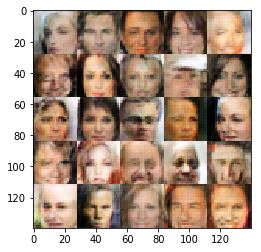

Epoch 4/5... Discriminator Loss: 0.8922... Generator Loss: 1.0189
Epoch 5/5... Discriminator Loss: 1.2342... Generator Loss: 0.5859
Epoch 5/5... Discriminator Loss: 2.1636... Generator Loss: 0.1997
Epoch 5/5... Discriminator Loss: 1.5932... Generator Loss: 0.6293


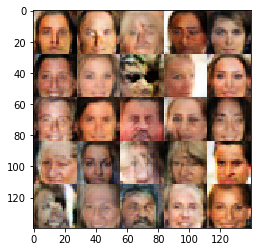

Epoch 5/5... Discriminator Loss: 1.7743... Generator Loss: 0.3433
Epoch 5/5... Discriminator Loss: 1.0970... Generator Loss: 0.7688
Epoch 5/5... Discriminator Loss: 0.8209... Generator Loss: 1.3864
Epoch 5/5... Discriminator Loss: 1.8313... Generator Loss: 0.2823


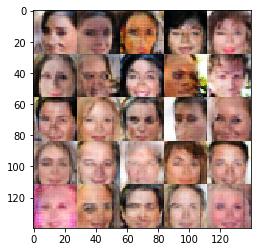

Epoch 5/5... Discriminator Loss: 2.0352... Generator Loss: 0.2304
Epoch 5/5... Discriminator Loss: 1.0741... Generator Loss: 0.8119
Epoch 5/5... Discriminator Loss: 1.6539... Generator Loss: 0.3751
Epoch 5/5... Discriminator Loss: 1.0342... Generator Loss: 0.8355


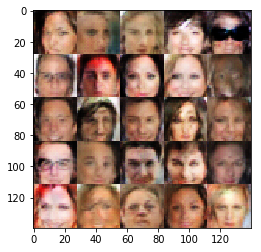

Epoch 5/5... Discriminator Loss: 1.3863... Generator Loss: 0.4349
Epoch 5/5... Discriminator Loss: 1.4257... Generator Loss: 0.5207
Epoch 5/5... Discriminator Loss: 1.3950... Generator Loss: 0.4880
Epoch 5/5... Discriminator Loss: 1.1733... Generator Loss: 0.6212


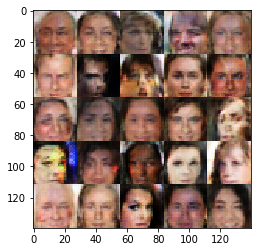

Epoch 5/5... Discriminator Loss: 1.4508... Generator Loss: 0.4147
Epoch 5/5... Discriminator Loss: 0.8981... Generator Loss: 1.0622
Epoch 5/5... Discriminator Loss: 1.6836... Generator Loss: 0.3409
Epoch 5/5... Discriminator Loss: 1.0950... Generator Loss: 0.6590


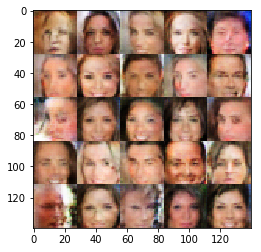

Epoch 5/5... Discriminator Loss: 1.3736... Generator Loss: 0.5182
Epoch 5/5... Discriminator Loss: 0.7961... Generator Loss: 1.3739
Epoch 5/5... Discriminator Loss: 1.0309... Generator Loss: 0.7759
Epoch 5/5... Discriminator Loss: 1.3244... Generator Loss: 0.5086


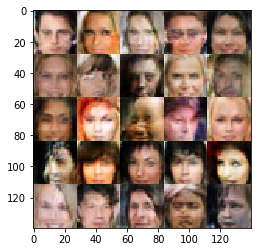

Epoch 5/5... Discriminator Loss: 1.3487... Generator Loss: 0.4693
Epoch 5/5... Discriminator Loss: 1.8648... Generator Loss: 0.2713
Epoch 5/5... Discriminator Loss: 2.0385... Generator Loss: 0.2758
Epoch 5/5... Discriminator Loss: 0.8280... Generator Loss: 2.0717


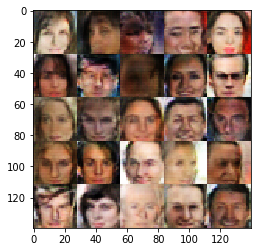

Epoch 5/5... Discriminator Loss: 1.6834... Generator Loss: 0.3607
Epoch 5/5... Discriminator Loss: 1.5872... Generator Loss: 0.4064
Epoch 5/5... Discriminator Loss: 1.1001... Generator Loss: 0.6796
Epoch 5/5... Discriminator Loss: 2.1158... Generator Loss: 0.2387


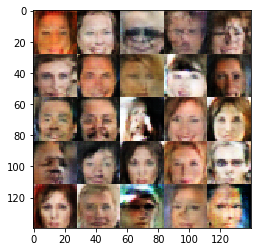

Epoch 5/5... Discriminator Loss: 2.2197... Generator Loss: 0.1637
Epoch 5/5... Discriminator Loss: 2.2410... Generator Loss: 0.3118
Epoch 5/5... Discriminator Loss: 1.3283... Generator Loss: 0.4834
Epoch 5/5... Discriminator Loss: 0.9458... Generator Loss: 1.4194


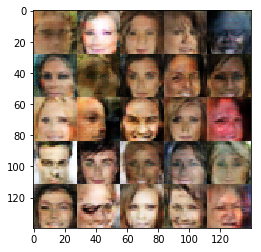

Epoch 5/5... Discriminator Loss: 2.1009... Generator Loss: 0.2030
Epoch 5/5... Discriminator Loss: 1.2419... Generator Loss: 2.0937
Epoch 5/5... Discriminator Loss: 1.2875... Generator Loss: 0.5508
Epoch 5/5... Discriminator Loss: 1.3590... Generator Loss: 0.4842


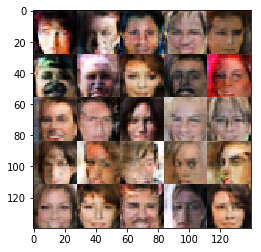

Epoch 5/5... Discriminator Loss: 2.1107... Generator Loss: 0.2224
Epoch 5/5... Discriminator Loss: 1.1216... Generator Loss: 0.6371
Epoch 5/5... Discriminator Loss: 1.7606... Generator Loss: 0.2842
Epoch 5/5... Discriminator Loss: 0.7578... Generator Loss: 1.4099


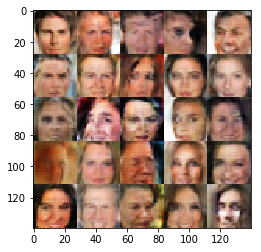

Epoch 5/5... Discriminator Loss: 2.4618... Generator Loss: 0.1798
Epoch 5/5... Discriminator Loss: 1.4991... Generator Loss: 0.4107
Epoch 5/5... Discriminator Loss: 2.2612... Generator Loss: 0.1677
Epoch 5/5... Discriminator Loss: 1.4517... Generator Loss: 0.4674


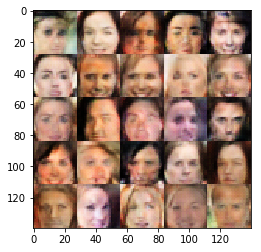

Epoch 5/5... Discriminator Loss: 1.8473... Generator Loss: 0.2896
Epoch 5/5... Discriminator Loss: 1.4985... Generator Loss: 0.4270
Epoch 5/5... Discriminator Loss: 1.2353... Generator Loss: 0.6082
Epoch 5/5... Discriminator Loss: 1.5962... Generator Loss: 0.3242


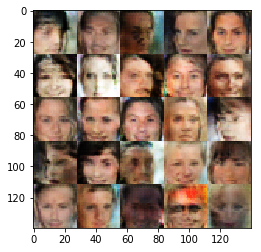

Epoch 5/5... Discriminator Loss: 1.3878... Generator Loss: 0.6173
Epoch 5/5... Discriminator Loss: 1.6656... Generator Loss: 0.3604
Epoch 5/5... Discriminator Loss: 2.0653... Generator Loss: 0.2209
Epoch 5/5... Discriminator Loss: 1.0653... Generator Loss: 0.7407


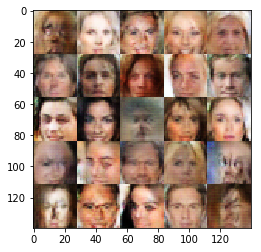

Epoch 5/5... Discriminator Loss: 0.9255... Generator Loss: 0.9074
Epoch 5/5... Discriminator Loss: 1.6018... Generator Loss: 0.3250
Epoch 5/5... Discriminator Loss: 0.8729... Generator Loss: 1.0942
Epoch 5/5... Discriminator Loss: 0.9222... Generator Loss: 1.7246


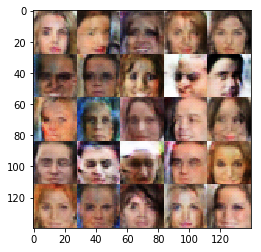

Epoch 5/5... Discriminator Loss: 0.8560... Generator Loss: 1.1932
Epoch 5/5... Discriminator Loss: 0.9473... Generator Loss: 0.8466
Epoch 5/5... Discriminator Loss: 1.0696... Generator Loss: 0.7117
Epoch 5/5... Discriminator Loss: 1.8051... Generator Loss: 0.3150


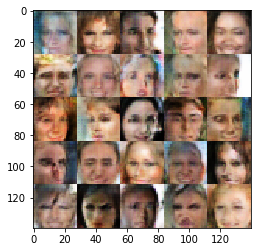

In [28]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 5

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.